In [177]:
import sys
sys.path.append("UF")
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
from qiskit_qec.circuits import ArcCircuit, RepetitionCodeCircuit
from qiskit_qec.decoders import UnionFindDecoder
from qiskit_aer import AerSimulator

from qiskit.providers.fake_provider import FakeSherbrooke

In [179]:
links = [[0, 1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 0]] # q1, a, q2 
T = 3 # number of syndrome measurement rounds

# code = ArcCircuit(links, T, basis='zz',logical='1') 
#qc = code.circuit['zz']

code = RepetitionCodeCircuit(5, T, xbasis=False, resets=True, barriers=True) 
qc = code.circuit['0']
print(qc.draw(fold=-1))
AerSimulator().run(qc).result().get_counts()

                     ░ ┌───┐               ┌───┐                ░ ┌─┐          ░       ░ ┌───┐               ┌───┐                ░ ┌─┐          ░       ░ ┌───┐               ┌───┐                ░ ┌─┐                        
      link_qubit_0: ─░─┤ X ├───────────────┤ X ├────────────────░─┤M├──────────░──|0>──░─┤ X ├───────────────┤ X ├────────────────░─┤M├──────────░──|0>──░─┤ X ├───────────────┤ X ├────────────────░─┤M├────────────────────────
                     ░ └─┬─┘┌───┐          └─┬─┘┌───┐           ░ └╥┘┌─┐       ░       ░ └─┬─┘┌───┐          └─┬─┘┌───┐           ░ └╥┘┌─┐       ░       ░ └─┬─┘┌───┐          └─┬─┘┌───┐           ░ └╥┘┌─┐                     
      link_qubit_1: ─░───┼──┤ X ├────────────┼──┤ X ├───────────░──╫─┤M├───────░──|0>──░───┼──┤ X ├────────────┼──┤ X ├───────────░──╫─┤M├───────░──|0>──░───┼──┤ X ├────────────┼──┤ X ├───────────░──╫─┤M├─────────────────────
                     ░   │  └─┬─┘┌───┐       │  └─┬─┘┌───┐      ░  ║ └╥┘┌─┐    ░       ░   │  └─

{'00000 0000 0000 0000': 1024}

In [180]:
#decoder = UnionFindDecoder(ArcCircuit(links, T))
decoder = UnionFindDecoder(code)
graph = decoder.decoding_graph.graph
graph.nodes()

sorted_nodes = sorted(graph.nodes(), key=lambda x: x['time'] if x['time'] is not None else -1)
sorted_nodes

[{'is_boundary': True, 'time': None, 'qubits': [0], 'index': 0, 'properties': {}},
 {'is_boundary': True, 'time': None, 'qubits': [4], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [1, 2], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [2, 3], 'index': 2, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [3, 4], 'index': 3, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [1, 2], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [2, 3], 'index': 2, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [3, 4], 'index': 3, 'properties': {}},
 {'is_boundary': False, 'time': 2, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 2, 'qubits': [1, 2], 'index': 1, 'properties':

In [193]:
max_index = max(graph.nodes()[node]['index'] for node in graph.node_indexes())
max_index

3

# Edge functions

In [191]:
print("graph.edges():", graph.edges())
print("graph.edge_list():", graph.edge_list())
print(graph.get_edge_data(0, 1))

graph.edges()[0]['weight'] = 0.5
print(graph.edges()[0])

graph.get_edge_data(0, 1)
print(graph.edge_list()[0][0])
print(graph.nodes()[graph.edge_list()[11][1]])


graph.edges(): [{'qubits': [], 'weight': 0.5, 'properties': {}}, {'qubits': [0], 'weight': 1, 'properties': {}}, {'qubits': [0], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [1], 'weight': 1, 'properties': {}}, {'qubits': [1], 'weight': 1, 'properties': {}}, {'qubits': [1], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [2], 'weight': 1, 'properties': {}}, {'qubits': [2], 'weight': 1, 'properties': {}}, {'qubits': [2], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [3], 'weight': 1, 'properties': {}}, {'qubits': [3], 'weight': 1, 'properties': {}}, {'qubits': [3], 'weight': 1, 'properties': {}}, {'qubits': [4], 'weight': 1, 'properties': {}}, {'qubits': [4], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, 'properties': {}}, {'qubits': [], 'weight': 1, '

# Plotter function

In [183]:
%load_ext autoreload
%autoreload 
sorted_nodes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[{'is_boundary': True, 'time': None, 'qubits': [0], 'index': 0, 'properties': {}},
 {'is_boundary': True, 'time': None, 'qubits': [4], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [1, 2], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [2, 3], 'index': 2, 'properties': {}},
 {'is_boundary': False, 'time': 0, 'qubits': [3, 4], 'index': 3, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [1, 2], 'index': 1, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [2, 3], 'index': 2, 'properties': {}},
 {'is_boundary': False, 'time': 1, 'qubits': [3, 4], 'index': 3, 'properties': {}},
 {'is_boundary': False, 'time': 2, 'qubits': [0, 1], 'index': 0, 'properties': {}},
 {'is_boundary': False, 'time': 2, 'qubits': [1, 2], 'index': 1, 'properties':

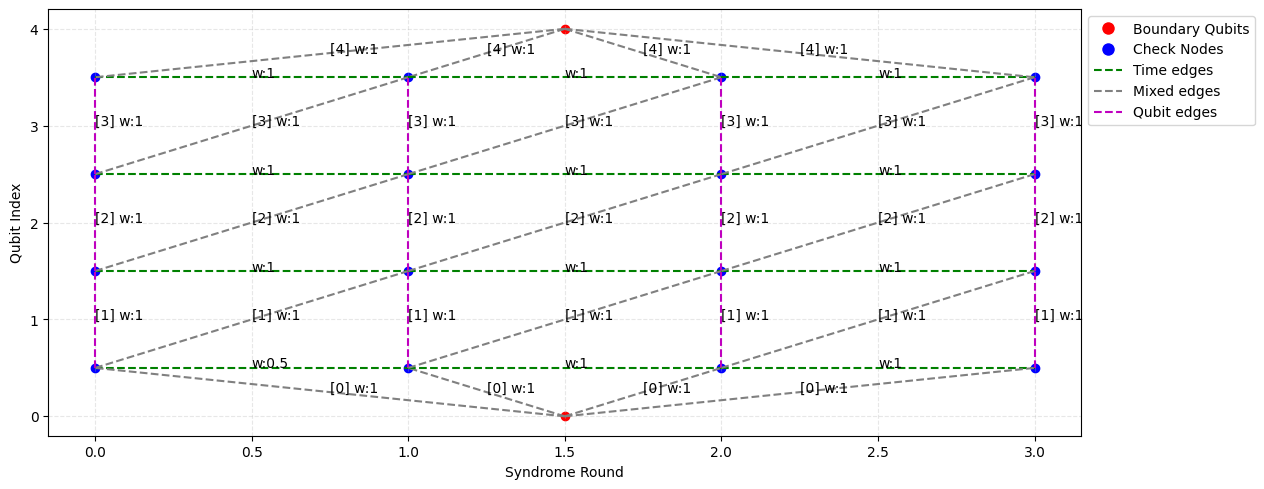

In [184]:
import sys
sys.path.append("UF")

import networkx as nx

from plot_functions import rx_draw, rx_draw_2D

rx_draw_2D(graph)

# Graphviz try

In [117]:
from retworkx.visualization import graphviz_draw

def my_node_attributes(node):
    return {'label': str(node)}

def my_edge_attributes(edge):
    return {'color': 'red'}

graphviz_draw(graph=graph, filename='output.dot', node_attr_fn=my_node_attributes, edge_attr_fn=my_edge_attributes)



# Networkx visualization

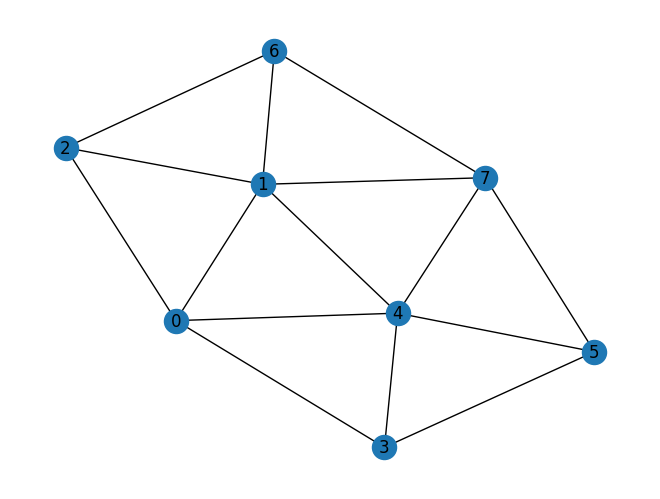

In [126]:
import retworkx as rx
import networkx as nx
import matplotlib.pyplot as plt

# Create a new NetworkX Graph object
G_nx = nx.Graph()

# Add nodes to NetworkX graph
for node in graph.node_indexes():
    G_nx.add_node(node)

# Add edges to NetworkX graph
for edge in graph.edge_list():
    src, tgt = edge
    G_nx.add_edge(src, tgt)

# Now you can plot using NetworkX and Matplotlib
import matplotlib.pyplot as plt
nx.draw(G_nx, with_labels=True, pos=nx.spring_layout(G_nx))
plt.show()